# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# according to instructor Eli
df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
# Eli says use len value_counts, len unique, or nunqiue of Mouse ID
print(df["Mouse ID"].nunique())

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# use pandas duplicated
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
duplicated_rows= df.duplicated()
df[duplicated_rows]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
# Eli says use loc
duplicate_data=df.loc[df["Mouse ID"] == "g989"]
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Eli Says either use loc where Mouse ID != something
# or use pandas isin
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
# according to instructor Eli
df_clean = df.loc[df["Mouse ID"] != "g989"]
df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
# Eli says this should be one less than we had before (i.e. 248)
print(df_clean["Mouse ID"].nunique())

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_mean= df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
grouped_median= df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
grouped_variance= df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
grouped_std=df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
grouped_sem=df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df= pd.DataFrame({"Mean":grouped_mean,
                      "Median":grouped_median,
                      "Variance":grouped_variance,
                      "Standard Deviation":grouped_std,
                      "Standard Error":grouped_sem})
summary_df
# Assemble the resulting series into a single summary DataFrame.
# Eli says use st.sem to get the standard error

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution but I just included this for practice)

# Using the aggregation method, produce the same summary statistics in a single line

# Eli says first do a group by
agg_summary= df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg({'mean','median','var','std','sem'})
agg_summary

# Eli says aggregation method means use https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html


,mean,var,sem,median,std
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,0.329346,41.557809,4.994774
Ceftamin,52.591172,39.290177,0.469821,51.776157,6.268188
Infubinol,52.884795,43.128684,0.492236,51.820584,6.567243
Ketapril,55.235638,68.553577,0.603860,53.698743,8.279709
Naftisol,54.331565,66.173479,0.596466,52.509285,8.134708
Placebo,54.033581,61.168083,0.581331,52.288934,7.821003
Propriva,52.320930,43.852013,0.544332,50.446266,6.622085
Ramicane,40.216745,23.486704,0.320955,40.673236,4.846308
Stelasyn,54.233149,59.450562,0.573111,52.431737,7.710419


## Bar and Pie Charts

<Axes: title={'center': 'Number of Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Observed Mice'>

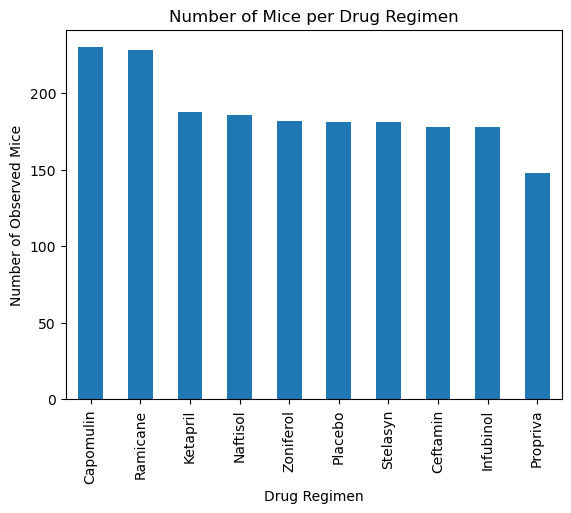

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Eli says use value_counts or a groupby and count to get the necessary counts
time_point_counts= df_clean.groupby("Drug Regimen")["Timepoint"].count()
time_point_counts_sorted= time_point_counts.sort_values(ascending=False)
time_point_counts_sorted.plot.bar(xlabel="Drug Regimen", ylabel= "Number of Observed Mice", title="Number of Mice per Drug Regimen")

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

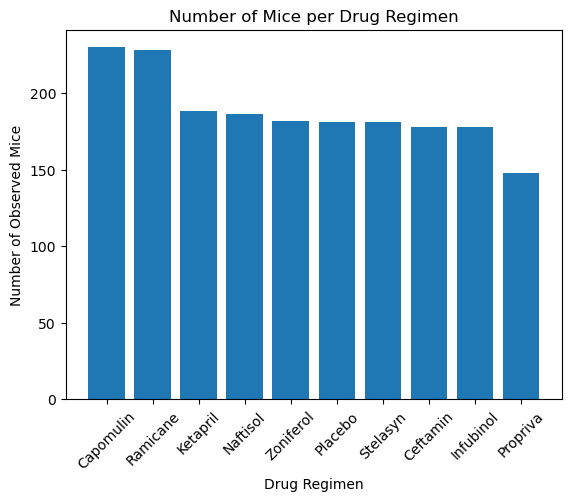

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplot_x= time_point_counts_sorted.index.values
pyplot_y=time_point_counts_sorted.values
plt.bar(pyplot_x,pyplot_y)

plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mice")
plt.title("Number of Mice per Drug Regimen")

Text(0.5, 1.0, 'Male and Female Distribution of Mice')

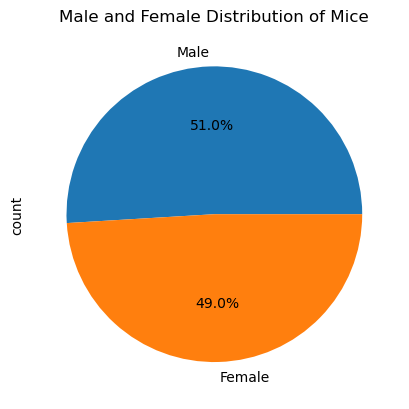

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count=df_clean["Sex"].value_counts()
gender_pie=gender_count.plot.pie(autopct='%1.1f%%')
plt.title("Male and Female Distribution of Mice")

Text(0, 0.5, 'Sex')

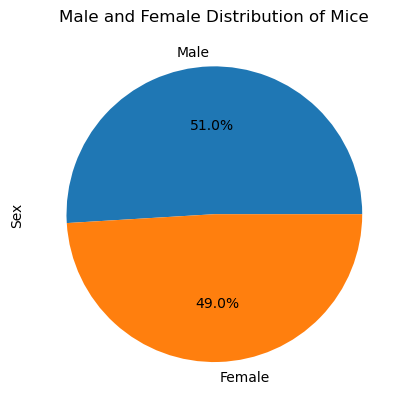

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_gender= gender_count.index.values
pyplot_gender_values=gender_count.values
plt.pie(pyplot_gender_values,labels=pyplot_gender, autopct="%1.1f%%")
plt.title("Male and Female Distribution of Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Eli says use groupby and max by timepoint
last_timepoint=df_clean.groupby("Mouse ID")["Timepoint"].max()
last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merge=pd.merge(last_timepoint,df_clean, how="left", on=("Mouse ID","Timepoint"))
# filter Df to include four treatments only. Collaborated with Paola on this part
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
timepoint_filtered = timepoint_merge[timepoint_merge["Drug Regimen"].isin(drug_regimens)]
timepoint_filtered.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# collaborated with Paola and Astrid on this part
# Put treatments into a list for for loop (and later for plot labels)
# Eli says use this list
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
volumes=[]
# Create empty list to fill with tumor vol data (for plotting)
# Eli says do something like volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Eli says the loop should look like
for treatment in treatments:
  # Locate the rows which contain mice on each drug and get the tumor volumes
  # add subset
   final_volumes= timepoint_filtered.loc[timepoint_filtered['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
   volumes.append(final_volumes)
   volume_quartiles = final_volumes.quantile([0.25, 0.75])
   lower_q = volume_quartiles[0.25]
   upper_q = volume_quartiles[0.75]
   iqr = upper_q - lower_q
   lower_bound = lower_q - (1.5 * iqr)
   upper_bound = upper_q + (1.5 * iqr)
 # Determine outliers using upper and lower bounds. Paola helped with code to include Drug in output
   outliers={}
   treatment_outliers= final_volumes[(final_volumes< lower_bound)|(final_volumes> upper_bound)]
   outliers[treatment]=treatment_outliers
   print(f"{treatment}'s potential outliers:")
   print(outliers)
   print()

Capomulin's potential outliers:
{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

Ramicane's potential outliers:
{'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64)}

Infubinol's potential outliers:
{'Infubinol': 31    36.321346
Name: Tumor Volume (mm3), dtype: float64}

Ceftamin's potential outliers:
{'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}



Text(0, 0.5, 'Final Tumor Volume (mm3)')

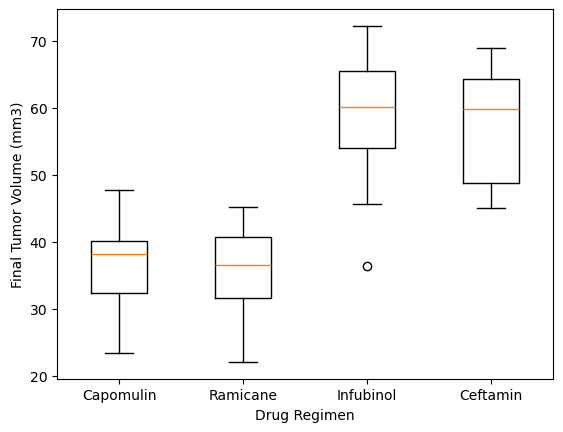

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Eli says use the list generated with the for loop
plt.boxplot(volumes, labels=treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume of Mouse B128 on Capomulin Over Time')

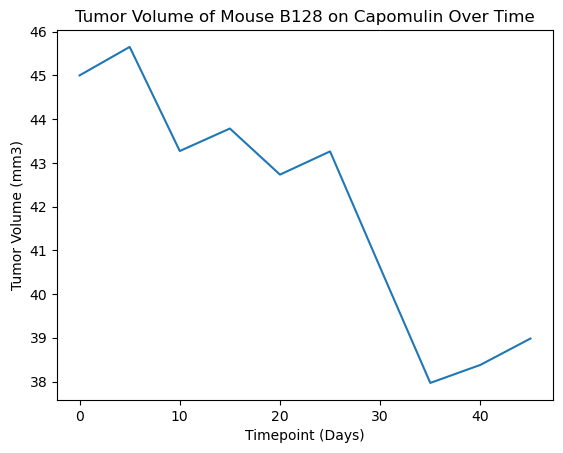

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data= df_clean[df_clean["Drug Regimen"] == "Capomulin"]
# capomulin_data.head()

b128_data= capomulin_data.loc[capomulin_data["Mouse ID"]=="b128"]
# b128_data.head(5)

line_x= b128_data["Timepoint"]
line_y= b128_data["Tumor Volume (mm3)"]
plt.plot(line_x,line_y)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of Mouse B128 on Capomulin Over Time")

In [17]:
capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


Text(0.5, 1.0, 'Mouse Weight vs Average Observed Tumor Volume for Mice on Capomulin')

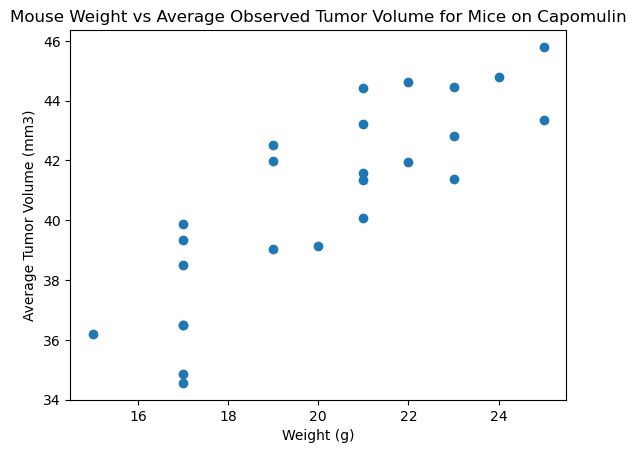

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# capomulin_data.head()
capomulin_tumor= capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
capomulin_tumor
capomulin_weight=capomulin_data.groupby(["Mouse ID"])["Weight (g)"].mean()
capomulin_weight
plt.scatter(capomulin_weight,capomulin_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Observed Tumor Volume for Mice on Capomulin")

## Correlation and Regression

Regression line equation: y = 0.95x + 21.55
Correlation Coefficient:0.84


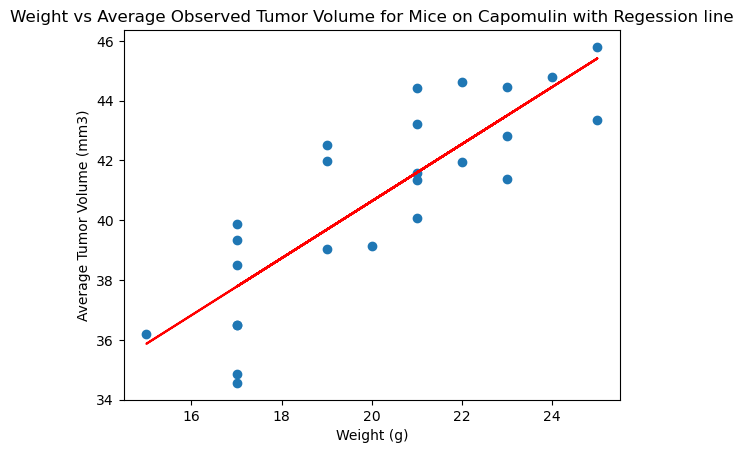

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_tumor= capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
capomulin_tumor
capomulin_weight=capomulin_data.groupby(["Mouse ID"])["Weight (g)"].mean()
capomulin_weight

# Perform linear regression and find correlation coefficient: code was written with help from Chat GPT and course materials
slope, intercept, r_value, p_value, std_err = linregress(capomulin_weight, capomulin_tumor)

plt.scatter(capomulin_weight,capomulin_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Observed Tumor Volume for Mice on Capomulin with Regession line")

# shows plot
plt.plot(capomulin_weight, slope*capomulin_weight + intercept, color='red')
print(f'Regression line equation: y = {slope:.2f}x + {intercept:.2f}')

correlation_coefficient= capomulin_weight.corr(capomulin_tumor)
print(f"Correlation Coefficient:{correlation_coefficient:.2f}")